---
## Projeto: Titanic - Desafio I2A2
---

Esta base de dados é um dos mais conhecidos projetos de dados, considerado o *"Hello Word"*  da ciência de dados. Iremos utilizar a metodologia CRISP-DM *(Cross Industry Standard Process for Data Mining)*. Neste notebook, iremos a metodologia CRISP-DM *(Cross Industry Standard Processo for Data Mining)*, para melhor entendimento,  iremos dividir esta análise em seções abordando cada etapa da metodologia. 



####  🚢 Sobre o Titanic 
 Famoso por ter sua história em um dos filmes de maior bilheteria do mundo, o *RSM Titanic* foi um navio britânico operadora pela White Star Line. Um  navio luxuoso e mais seguro de sua época, considerados por muitos o navio inafundável. Sua viagem inaugural foi dia 10 de abril de 1912, mas no dia 14 de abril o navio bateu em um iceberg, dando início uma dos maiores acidentes marítimos do mundo, com mais 1.500 mortes. 

![Titanic](https://aventurasnahistoria.uol.com.br/media/uploads/titanic_cgzvpEm.jpg)

#### 🔎 1. Business Understanding
Nesta etapa, é realizada a identificação do problema que se quer resolver. 

##### **Objetivo**
Nesta análise o objetivo é realizar uma análise exploratória dos dados para posteriomente desenvolver um modelo preditivo de sobrevivência no titanic. Para isso, iremos fazer levantar algumas questões ao longo desse projeto.

#### 📑 2. Data Understanding

Agora iremos, coletar e tratar os dados para atingir o nosso objetivo. Para esse projeto serão utilizadas duas bases: *train* e *test*.

*Data Dictionary*

**Kaggle_Pass_Id:** Id do Kaggle 

**pclass:** Tipo do bilhete da classe

**survived:** Sobreviveu -> Sim = 1 , Não = 0

**name:** Nome 

**sex:** Sexo 

**age:** Idade 

**sibsp:** Irmãos/cônjuges a bordo do Titanic

**parch:** Pais/filhos a bordo do Titanic

**ticket:** Número do bilhete

**fare:** Tarifa do passageiro 

**cabin:** Número da cabine 

**embarked:** Porto de embarque C = Cherbourg, Q = Queenstown, S = Southampton

**boat:**  Número do bote salva vida 

**body:** não identificado 

**home.dest:**  Destino

**orig_seq:** Identificador sequencial

##### 2.1 Importação das bibliotecas

In [1]:
#carregando as bibliotecas
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import math
import re

import warnings

#mensagens de warnings 
warnings.filterwarnings("ignore")

In [2]:
#configs 
%matplotlib inline

plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='pastel')
rcParams['figure.figsize'] = 8,6

##### 2.2 Coleta dos Dados

Para esta análise usaremos dois arquivos CSV: 
- train.csv: conjunto de dados de treinamento, contém a variável alvo (sobreviveu ou não) e as informações sobre cada passageiros.
- test.csv: conjuntos de dados de teste e não contém a variável alvo. 
Nesta análise, usaremos toda a base (treino+teste) para realizar a análise exploratória dos dados. 

In [3]:
#data load - train
train = pd.read_excel('data/Train.xlsx', engine="openpyxl")
train.head()

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619


In [4]:
#data load - test 
test = pd.read_excel('data/Test.xlsx', engine="openpyxl")
test.head()

,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN,925
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,1291
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,NaN,"Cambridge, MA",512
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,131.0,NaN,1297
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,15,NaN,NaN,868


In [5]:
data_full =  pd.concat([train, test], ignore_index=True)

In [6]:
data_full.head()

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,0.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,1.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,0.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619


Nessa parte, iremos verificar como estão os dados, verificando sua dimensão, colunas e dados nulos.

In [7]:
data_full.shape

(1309, 16)

In [8]:
print('O dataset possui {} linhas e {} colunas'.format(data_full.shape[0], data_full.shape[1]))

O dataset possui 1309 linhas e 16 colunas


In [9]:
data_full.columns.values

array(['Kaggle_Pass_Id', 'pclass', 'survived', 'name', 'sex', 'age',
       'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat',
       'body', 'home.dest', 'orig_seq'], dtype=object)

In [10]:
print (data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaggle_Pass_Id  1309 non-null   int64  
 1   pclass          1309 non-null   int64  
 2   survived        891 non-null    float64
 3   name            1309 non-null   object 
 4   sex             1309 non-null   object 
 5   age             1046 non-null   float64
 6   sibsp           1309 non-null   int64  
 7   parch           1309 non-null   int64  
 8   ticket          1309 non-null   object 
 9   fare            1308 non-null   float64
 10  cabin           295 non-null    object 
 11  embarked        1307 non-null   object 
 12  boat            486 non-null    object 
 13  body            121 non-null    float64
 14  home.dest       745 non-null    object 
 15  orig_seq        1309 non-null   int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 163.8+ KB
None


##### 2.3 Verificação de dados Nulos

In [11]:
#verificar valores nulos 
data_full.isnull().sum()

Kaggle_Pass_Id       0
pclass               0
survived           418
name                 0
sex                  0
age                263
sibsp                0
parch                0
ticket               0
fare                 1
cabin             1014
embarked             2
boat               823
body              1188
home.dest          564
orig_seq             0
dtype: int64

Na verificação de dados nulos, podemos ver que temos algumas colunas importante para nossa análise com valores nulos/NaN como: `survived`, `age` e `cabin`. Existem opções para fazer esse tratamento: 
- Eliminar os dados nulos 
- Substituir os dados nulos por valores (média, valor fixo)


Como essas colunas são importantes para nossa análise, eliminar os dados faltantes perderemos informaçõe que são fundamentais, por isso para a coluna `age` iremos substituir pela média de idade.
Para a coluna `survived` iremos eliminar as colunas com dados nulos 

In [12]:
#obtenddo a média das idades 
media_idade = math.floor(data_full['age'].mean())

#imprimindo a média das idades 
print('A média da idade dos passageiros do titanic é {} anos'.format(media_idade))

A média da idade dos passageiros do titanic é 29 anos


In [13]:
#substituindo os valores nulos pela média das idades 
data_full['age'] = data_full['age'].fillna(media_idade)

In [14]:
print('Quantidade de passageiros:', data_full['survived'].value_counts()[0] + data_full['survived'].value_counts()[1])
print ('Quantidade de passageiros sobreviventes:', data_full['survived'].value_counts()[0])
print ('Quantidade de passageiros mortos:', data_full['survived'].value_counts()[1])

Quantidade de passageiros: 891
Quantidade de passageiros sobreviventes: 549
Quantidade de passageiros mortos: 342


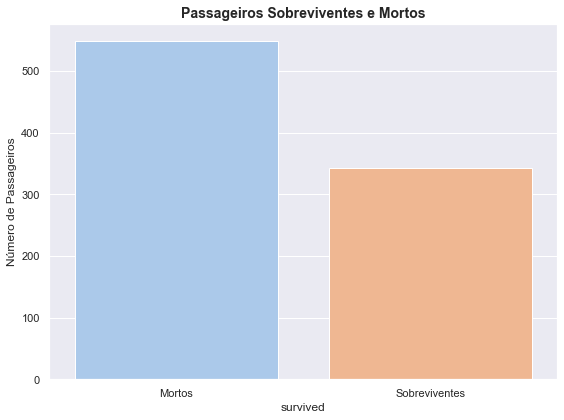

In [15]:
sns.countplot (x='survived', data=data_full, order= data_full['survived'].value_counts().index)
plt.title('Passageiros Sobreviventes e Mortos', fontweight='bold', fontsize=14)
plt.ylabel("Número de Passageiros")
plt.xticks(np.arange(2), ['Mortos', 'Sobreviventes'])
plt.tight_layout()
plt.show();

In [16]:
data_full['survived'].value_counts(normalize = True)

0.0    0.616162
1.0    0.383838
Name: survived, dtype: float64

Verificamos que `cabin` também possui valores nulos, não podemos excluir pois possui informações importantes sobre a coluna `survived`. Para  realizar esse tratamento, iremos substituir os valores nulos por `X` que representa informação não cadastrada. Iremos verificar durante este notebook que com essa informação teremos também a informação dos andares das cabines.

In [17]:
#substituindo  os valores NaN  da coluna cabin por  não encontrada 
data_full['cabin'].fillna('X', inplace=True)

In [18]:
#verificando novamente os dados nulos 
data_full.isnull().sum()

Kaggle_Pass_Id       0
pclass               0
survived           418
name                 0
sex                  0
age                  0
sibsp                0
parch                0
ticket               0
fare                 1
cabin                0
embarked             2
boat               823
body              1188
home.dest          564
orig_seq             0
dtype: int64

In [19]:
#descrição  estatística 
data_full.describe()

,Kaggle_Pass_Id,pclass,survived,age,sibsp,parch,fare,body,orig_seq
count,1309.000000,1309.000000,891.000000,1309.00000,1309.000000,1309.000000,1308.000000,121.000000,1309.000000
mean,655.000000,2.294882,0.383838,29.70410,0.498854,0.385027,33.295479,160.809917,655.000000
std,378.020061,0.837836,0.486592,12.88804,1.041658,0.865560,51.758668,97.696922,378.020061
min,1.000000,1.000000,0.000000,0.16670,0.000000,0.000000,0.000000,1.000000,1.000000
25%,328.000000,2.000000,0.000000,22.00000,0.000000,0.000000,7.895800,72.000000,328.000000
50%,655.000000,3.000000,0.000000,29.00000,0.000000,0.000000,14.454200,155.000000,655.000000
75%,982.000000,3.000000,1.000000,35.00000,1.000000,0.000000,31.275000,256.000000,982.000000
max,1309.000000,3.000000,1.000000,80.00000,8.000000,9.000000,512.329200,328.000000,1309.000000


Como podemos observar, na coluna `age` temos a idade mínima de 0.166 (ou seja 1 mês) e a máxima de 80 anos. No decorrer desse notebook, iremos ver que realmente existiu um passageiro sobrevivente com essa idade.  A média das idades dos passageiros é 29 anos. 

In [20]:
data_full.shape

(1309, 16)

##### Idade X Sobrevivente 

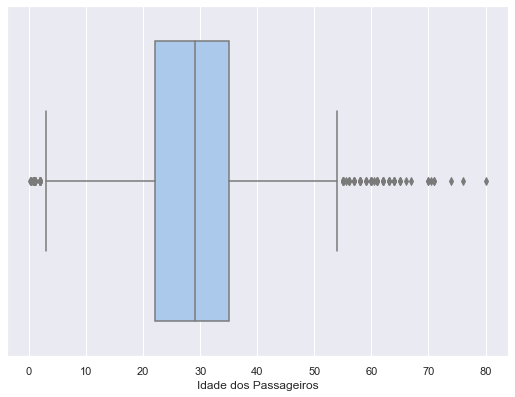

In [21]:
ax = sns.boxplot(x=data_full['age'])
ax.set_xlabel('Idade dos Passageiros')
plt.show();

Percebemos que existem idade que podem ser um outliers, iremos verificar essa idade máxima de 80 anos.

In [22]:
sob_idade_max = data_full[(data_full['survived']==1) & (data_full['age']==max(data_full.age))]
sob_idade_max

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
630,631,1,1.0,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,B,NaN,"Hessle, Yorks",15


Através de pesquisas o Mr. Algernor era Juiz de Paz de Hessle na Inglaterra, nasceu dia 4 de junho de 1864. Embarcou no Titanic em Southampton, Inglaterra na primeira classe. Ele não foi um dos passageiros que foram salvos pelos botes, ele utilizou um bote que estava virado para flutuar, tornando um das poucas pessoas que sobreviveram ao alto mar. Vários registros informam o falecimento dele aos 80 anos e que ele embarcou com 47 anos. Então, possivelmente essa informação é equívocada. 
Iremos utilizar a segunda maior idade para nossa análise.

In [23]:
sob_idade_max_second = data_full[(data_full['survived']==1) & (data_full['age']!=80.0)]
sob_idade_max_second = sob_idade_max_second[(sob_idade_max_second['survived']==1) & (sob_idade_max_second['age']==max(sob_idade_max_second.age))]
sob_idade_max_second

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
275,276,1,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",7
483,484,3,1.0,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,X,S,15,NaN,NaN,1262


Miss Kornelia Theodosia nasceu em Hudson, EUA em 12 de agosto de 1848. Ela foi uma das  Gerentes Hospital da Cidade de Hudson desde sua fundação e foi sua vice-presidente em 1912. No dia do trágico acidente,  Kornelia conseguiu sobreviver utilizando o barco salva-vidas. Ela nunca se casou e morreu menos de dois anos após o naufrágio aos 65 anos.
Já Mrs. Hedwig nasceu em Jalasjärvi, Finlândia, no dia 5 de junho de 1848. Ela embarcou no titanic em  Southampton como passageira da terceira classe. No dia do acidente, utlizou o barco salva vidas no seu relato informa que o barco estava preenchido apenas com dois terços de sua capacidade e poderia ter levado mais pessoas. Ela faleceu no dia 3 de abril de 1922 aos 74 anos. 

In [24]:
data_full[data_full['age'] == min(data_full['age'])]

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
1245,1246,3,NaN,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.575,X,S,10,NaN,"Devon, England Wichita, KS",764


Apesar de não possui na base a informação que sobriveu, a Miss. Elizabeth Gladys "Millvina" é a sobrevivente mais nova do titanic, ela nasceu em Branscombe, em 1912. Junto com ela, sua mãe e seu irmão sobreviveram ao acidente, seu pai morreu no navio. Ela faleceu em 31 de maio de 2009 aos 97 anos.

Vamos atualizar a idade do passageiro Mr. Algernon Henry Wilson e a coluna `survived` de Miss. Elizabeth Gladys "Millvina"

In [25]:
data_full.loc[data_full['Kaggle_Pass_Id']==631, 'age'] = 47
data_full.loc[data_full['Kaggle_Pass_Id']==1246, 'survived'] = 1.0

In [26]:
idade_min = data_full[(data_full['survived']==1) & (data_full['age']==min(data_full.age))]
idade_min

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
1245,1246,3,1.0,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.575,X,S,10,NaN,"Devon, England Wichita, KS",764


Passageiro mais Novo: 0.1667 e o mais Velho: 76.0


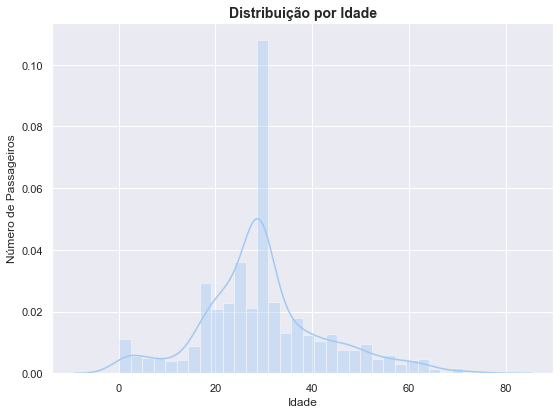

In [27]:
# idade do passageiro mais novo e mais velho 
print('Passageiro mais Novo: {} e o mais Velho: {}'.format(data_full['age'].min(), data_full['age'].max()))
sns.distplot(data_full["age"])
plt.title("Distribuição por Idade", fontweight='bold', fontsize=14)
plt.xlabel("Idade")
plt.ylabel("Número de Passageiros")
plt.show();

Agora vamos verificar se a idade influenciou na taxa de sobrevivência.

In [28]:
sobreviventes_age = data_full[data_full["survived"]==1]["age"]
mortos_age = data_full[data_full["survived"]==0]["age"]

In [29]:
sobreviventes_age

1       38.0000
2       26.0000
3       35.0000
8       27.0000
9       14.0000
         ...   
879     56.0000
880     25.0000
887     19.0000
889     26.0000
1245     0.1667
Name: age, Length: 343, dtype: float64

In [30]:
mortos_age

0      22.0
4      35.0
5      29.0
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888    29.0
890    32.0
Name: age, Length: 549, dtype: float64

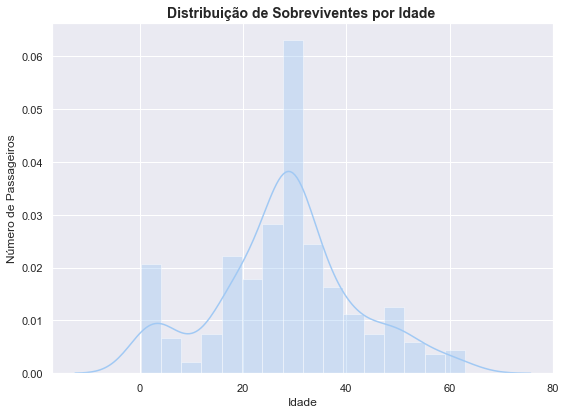

In [31]:
sns.distplot(sobreviventes_age)
plt.title("Distribuição de Sobreviventes por Idade ", fontweight='bold', fontsize=14)
plt.xlabel("Idade")
plt.ylabel("Número de Passageiros")
plt.show();

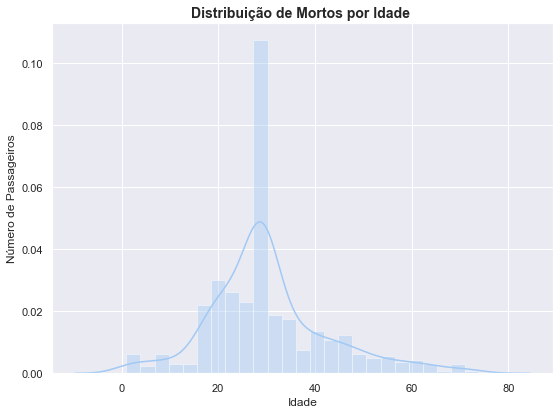

In [32]:
sns.distplot(mortos_age)
plt.title("Distribuição de Mortos por Idade ", fontweight='bold', fontsize=14)
plt.xlabel("Idade")
plt.ylabel("Número de Passageiros")
plt.show();

##### Gênero X Sobrevivente 

In [33]:
pd.DataFrame(data_full.groupby('survived')['sex'].describe())

,count,unique,top,freq
survived,,,,
0.0,549,2,male,468
1.0,343,2,female,234


In [34]:
sobreviventes = data_full[data_full["survived"]==1]["sex"].value_counts()
mortos = data_full[data_full["survived"]==0]["sex"].value_counts()

In [35]:
print('Total de Sobreviventes é:', sobreviventes.sum())
print ('Sobreviventes do Gênero Masculino:', sobreviventes.male.sum())
print ('Sobreviventes do Gênero Feminino:', sobreviventes.female.sum())

Total de Sobreviventes é: 343
Sobreviventes do Gênero Masculino: 109
Sobreviventes do Gênero Feminino: 234


In [36]:
print ('% de Homens que sobreviveram:', sobreviventes.male.sum()/ (sobreviventes.sum()))
print ('% de Mulheres que sobreviveram:',sobreviventes.female.sum()/ (sobreviventes.sum()))

% de Homens que sobreviveram: 0.3177842565597668
% de Mulheres que sobreviveram: 0.6822157434402333


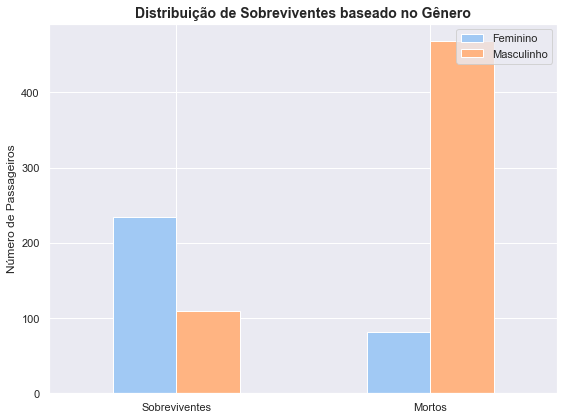

In [37]:
base_sex = pd.DataFrame([sobreviventes,mortos])
base_sex.index = ["Sobreviventes","Mortos"]
base_sex.plot(kind="bar")
plt.title("Distribuição de Sobreviventes baseado no Gênero",  fontweight='bold', fontsize=14)
plt.ylabel("Número de Passageiros")
plt.legend(( 'Feminino', 'Masculinho'), loc='upper right')
plt.xticks(rotation = False)
plt.tight_layout()

Como podemos observar, as mulheres possui a maior taxa de sobreviventes do que os homens,  devido a prioridade de embarcação de mulheres e crianças  aos botes salva-vidas. 

In [38]:
mulheres = data_full[data_full['sex'] == 'female']
mulheres.head()

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,1.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,NaN,NaN,NaN,861
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
8,9,3,1.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,X,S,15,NaN,NaN,900
9,10,2,1.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,X,C,NaN,NaN,"New York, NY",514


In [39]:
homens = data_full[data_full['sex'] == 'male']
homens.head()

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,0.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,NaN,NaN,"Bridgerule, Devon",690
4,5,3,0.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619
5,6,3,0.0,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,X,Q,NaN,NaN,NaN,1031
6,7,1,0.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN,175.0,"Dorchester, MA",202
7,8,3,0.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,X,S,NaN,4.0,NaN,1097


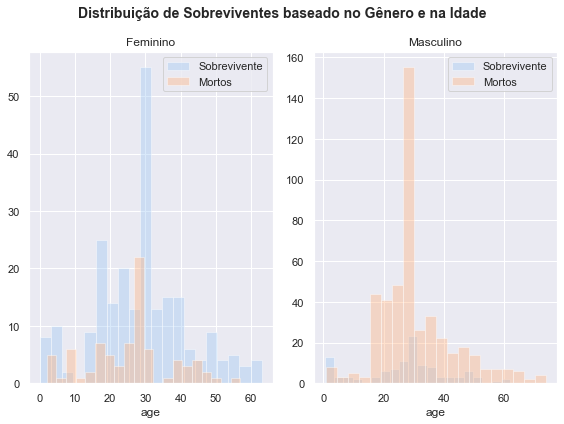

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

ax = sns.distplot(mulheres[mulheres['survived']==1].age, bins=20, ax = axes [0], kde=False)
ax = sns.distplot(mulheres[mulheres['survived']==0].age, bins=20,  ax = axes [0], kde=False)
ax.set_title ('Feminino') 
ax.legend(( 'Sobrevivente', 'Mortos'), loc='upper right')
plt.xticks(rotation = False)

plt.suptitle('Distribuição de Sobreviventes baseado no Gênero e na Idade',fontweight='bold', fontsize=14)

ax = sns.distplot(homens[homens['survived']==1].age, bins=20,  ax = axes [1], kde=False)
ax = sns.distplot(homens[homens['survived']==0].age, bins=20, ax = axes [1], kde=False)
ax.set_title ('Masculino') 
ax.legend(( 'Sobrevivente', 'Mortos'), loc='upper right')
plt.xticks(rotation = False)

plt.tight_layout()

Podemos observar que as mulheres de 12 a 40 anos tem uma alta probablidade de sobrevivência, como as crianças e mulheres tem prioridade  no embarque dos botes salva-vidas, possivelmente essas mulheres seriam mães com seus filhos (as) e o que demonstra essa hipótese é a alta probabilidade de crianças tanto do gênero masculino quanto do feminino entre 0 a 5 anos. Também podemos observar que mulheres com 30 anos possui uma alta probabilidade de sobrevivência.

Já os homens possui probabilidade de sobrevivência por volta de 28 a 38 anos. 

##### Cabine X Sobrevivente 

In [41]:
data_full['cabin'].value_counts()

X                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: cabin, Length: 187, dtype: int64

Geralmente, o número de idenficação das cabines pode conter o andar do navio. Como podemos obersar no resultado acima, apresenta as cabines composta por Letras e Números. O que pode representar a categoria da passagem, podemos analisar o andar com a taxa de sobrevivência, para isso iremos criar uma outra variável que será o andar. Podemos inferir: 
- As cabines mais próximas dos botes salva-vidas conseguiram sobreviver?
- As cabines mais próximas das partes danificadas após o acidente conseguiram sobreviver?


Conforme imagem do conves do titanic, observa-se os andares vão de A - G. 

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/800px-Titanic_cutaway_diagram.png)

In [42]:
data_full['floor'] = data_full['cabin'].str.split('', expand=True)[1]
data_full['floor'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: floor, dtype: int64

Sabemos que o `X` são os valores que substituiram o valor NaN. Podemos observar que T Possui uma cabine.

In [43]:
data_floor = data_full.query("floor != 'X'")
data_floor

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq,floor
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86,C
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128,C
6,7,1,0.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN,175.0,"Dorchester, MA",202,E
10,11,3,1.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,13,NaN,NaN,1190,G
11,12,1,1.0,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio",34,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,1,NaN,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,5,NaN,"New York, NY",121,D
1296,1297,2,NaN,"Nourney, Mr. Alfred (""Baron von Drachstedt"")",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,7,NaN,"Cologne, Germany",521,D
1298,1299,1,NaN,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,NaN,NaN,"Elkins Park, PA",313,C
1302,1303,1,NaN,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,14,NaN,"Fond du Lac, WI",209,C


In [44]:
print('Nomenclatura dos andares da cabines:', data_floor['floor'].unique())

Nomenclatura dos andares da cabines: ['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [45]:
print ('Andar {} teve mais passageiros: {}'.format(data_floor['floor'].value_counts().index[0], data_floor['floor'].value_counts().max()))
print ('Andar {}  teve menos passageiros: {}'.format(data_floor['floor'].value_counts().index[-1], data_floor['floor'].value_counts().min()))

Andar C teve mais passageiros: 94
Andar T  teve menos passageiros: 1


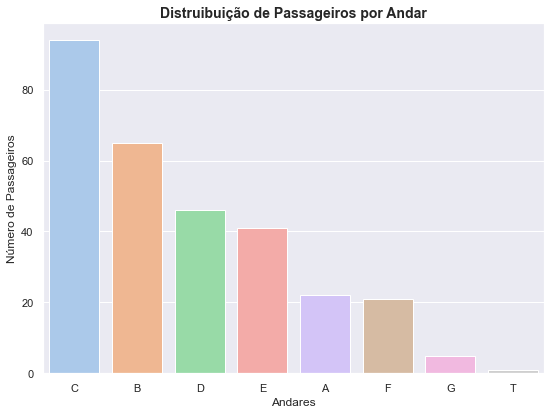

In [46]:
sns.countplot (x='floor', data=data_floor, order= data_floor['floor'].value_counts().index)
plt.title('Distruibuição de Passageiros por Andar', fontweight='bold', fontsize=14)
plt.ylabel("Número de Passageiros")
plt.xlabel("Andares")
plt.show();

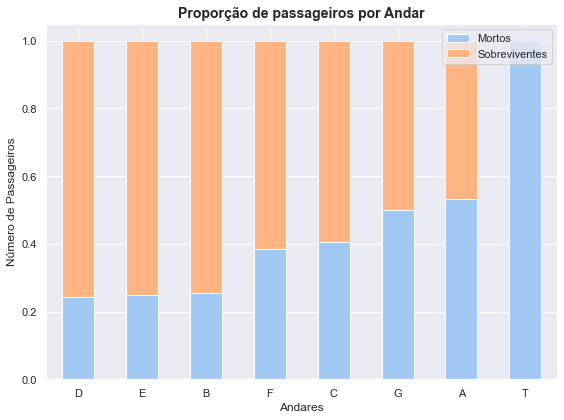

In [47]:
sob_por_andar = data_floor.groupby('floor')['survived'].value_counts(normalize=True).unstack().sort_values(by=1, ascending=False)
sob_por_andar.plot(kind="bar", stacked= 'True')
plt.title('Proporção de passageiros por Andar', fontweight='bold', fontsize=14)
plt.ylabel("Número de Passageiros")
plt.xlabel("Andares")
plt.legend(( 'Mortos', 'Sobreviventes'), loc='upper right')
plt.xticks(rotation = False)
plt.tight_layout()

O andar C é o que possui a maior número de passageiros, no entanto o que possui o maior número de sobrevivente é o da classe D e E.
Já o andar A é o último na porcentagem de sobrevivência, ignorando o andar T que possui somente uma cabine. 

##### Classe x Sobrevivente

In [48]:
data_full['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [49]:
print ('A classe {} que teve mais passageiros: {}'.format(data_full['pclass'].value_counts().index[0], data_full['pclass'].value_counts().max()))
print ('A classe {} que teve menos passageiros: {}'.format(data_full['pclass'].value_counts().index[-1], data_full['pclass'].value_counts().min()))

A classe 3 que teve mais passageiros: 709
A classe 2 que teve menos passageiros: 277


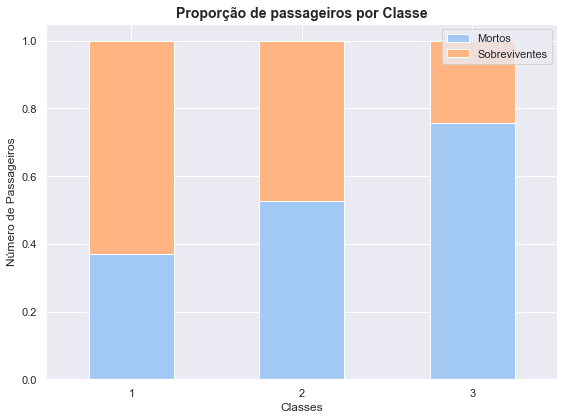

In [50]:
sob_por_classe = data_full.groupby('pclass')['survived'].value_counts(normalize=True).unstack().sort_values(by=1, ascending=False)
sob_por_classe.plot(kind="bar", stacked= 'True')
plt.title('Proporção de passageiros por Classe', fontweight='bold', fontsize=14)
plt.ylabel("Número de Passageiros")
plt.xlabel("Classes")
plt.legend(( 'Mortos', 'Sobreviventes'), loc='upper right')
plt.xticks(rotation = False)
plt.tight_layout()

Como podemos observar, a 1ª classe obteve mais sobreviventes enquanto a 3ª possui a maior quantidade de mortos.

##### Em família  x Sobrevivente

Como verificamos a chance de sobrevivência de mulheres e crianças são altas. Será que os passageiros que estavam com suas famílias tiveram mais chances de sobrevivência. Vamos verificar nesta seção:

In [51]:
pd.DataFrame (data_full.groupby('sibsp')['survived'].describe())

,count,mean,std,min,25%,50%,75%,max
sibsp,,,,,,,,
0,608.0,0.345395,0.475888,0.0,0.0,0.0,1.00,1.0
1,210.0,0.538095,0.499738,0.0,0.0,1.0,1.00,1.0
2,28.0,0.464286,0.507875,0.0,0.0,0.0,1.00,1.0
3,16.0,0.250000,0.447214,0.0,0.0,0.0,0.25,1.0
4,18.0,0.166667,0.383482,0.0,0.0,0.0,0.00,1.0
5,5.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
8,7.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [52]:
pd.DataFrame (data_full.groupby('parch')['survived'].describe())

,count,mean,std,min,25%,50%,75%,max
parch,,,,,,,,
0,678.0,0.343658,0.475279,0.0,0.0,0.0,1.0,1.0
1,118.0,0.550847,0.499529,0.0,0.0,1.0,1.0,1.0
2,81.0,0.506173,0.503077,0.0,0.0,1.0,1.0,1.0
3,5.0,0.600000,0.547723,0.0,0.0,1.0,1.0,1.0
4,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0
6,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data_full['tamanho_familia'] = data_full['sibsp'] + data_full['parch'] + 1
data_full.head()

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq,floor,tamanho_familia
0,1,3,0.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,NaN,NaN,"Bridgerule, Devon",690,X,2
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86,C,2
2,3,3,1.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,NaN,NaN,NaN,861,X,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128,C,2
4,5,3,0.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619,X,1


In [54]:
data_full['tamanho_familia'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: tamanho_familia, dtype: int64

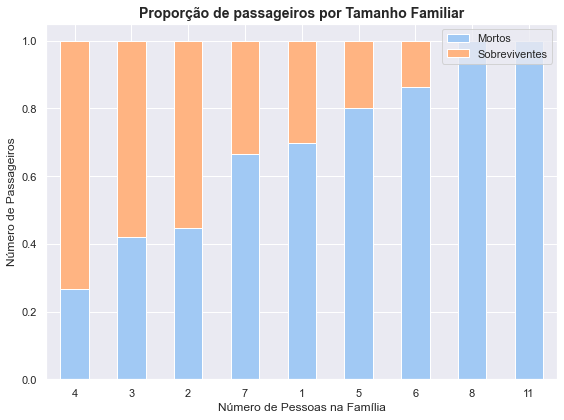

In [55]:
sob_por_familia= data_full.groupby('tamanho_familia')['survived'].value_counts(normalize=True).unstack().sort_values(by=1, ascending=False)
sob_por_familia.plot(kind="bar", stacked= 'True')
plt.title('Proporção de passageiros por Tamanho Familiar', fontweight='bold', fontsize=14)
plt.ylabel("Número de Passageiros")
plt.xlabel("Número de Pessoas na Família")
plt.legend(( 'Mortos', 'Sobreviventes'), loc='upper right')
plt.xticks(rotation = False)
plt.tight_layout()

Podemos observar que quanto o menor número de pessoas da família a borda maiores são as chances de sobrevivência.

#### 🎯 4. Conclusões da Análise

Muitas pessoas conhecem a tragédia do Titanic através do filme de 1998, como mostra no filme não existiam botes salva-vidas para todos os passageiros e tripulações. Através dessa análise podemos realizar suposições das taxas de sobrevivência dos passageiros.
Esta base possui 891 passageiros desses 549 sobreviveram cerca de 61,6% e 342 infelizmente não sobreviveram representando 38,3%. O navio possuía 20 botes salva-vidas que poderia acomodar 1178 pessoas. Mas foram utilizados 18 botes salva-vidas e muitos com sua capacidade mínima. 

Outro ponto relevante é as mulheres e crianças possuem a maior taxa de sobreviventes do que os homens devido pela prioridade definidas para embarcar nos botes. A idade dos passageiros variam de 1 mês  a 63 anos. As posições dos  andares também foram analisados, sendo que o andar C é o que possui a maior número de passageiros, mas é o quinto em taxa de sobreviventes. O que teve maior taxa foram dos andares D e E.
O tamanho da família também pode influenciar a taxa de sobrevivência, conforme observado família com muitos componentes não sobreviveram e aquelas menores tivaram mais chance de sobrevivência. A primeira classe obteve o maior número de sobrevivência, pode inferir que outros critérios além de mulheres e crianças podem ter sido utilizado um critério social.

A terceira classe possui o maior número de passageiros e a maioria se afogou já a segunda classe possui o maior número de passageiros e a segunda com maior número de sobreviventes. Analisando todas as variáveis é possível inferir que mulher, jovem e tenha passagem na primeira classe e no andar D ou E tem maior chance de sobrevivência. Mas ressaltamos que em uma situação de emergência outras variáveis humanas também refletem na sobrevivência. 